In [1]:
import csv, re
import pandas as pd
import sys
sys.path.append("..")
from plateLighting import Well, PlateLighting



In [ ]:
class WelltoWell:
    '''
    Loads a csv file to create a transfer protocol.
    
    Owns:
        2x PlateLighting
        1x TransferProtocol
        
    '''
    def __init__(self, csv = None):
        self.csv = csv
        self.error_msg = ''
        self.df = None
        
        if csv is not None:
            self.loadCsv(csv)
            
        
        
    def loadCsv(self, csv):
        try:
            self.df = pd.read_csv(csv)
        except:
            print('Failed to load file csv %s' % csv)
            return '_'
           
        hasSourDupes, msg_s = self.checkDuplicateSource()
        hasDestDupes, msg_d = self.checkDuplicateDestination()
            
        if hasSourDupes or hasDestDupes:
            print(str(msg_s) + msg_d)
        
            
    def checkDuplicateDestination(self):
        hasDupes = False
        dupes_mask = self.df.duplicated(subset = 'TargetWell')
        dupes = self.df.where(dupes_mask).dropna()
        duplicates = set(dupes['TargetWell'].values)
        error_msg = ''
        
        if len(duplicates)==0:
            return hasDupes, error_msg
        else:
            hasDupes = True
        
        for element in duplicates:
            subset = self.df.where(df['TargetWell'] == element).dropna()

            indices = []
            for index, row in subset.iterrows():
                indices.append(index)
                target = row['TargetWell']
            error_msg = error_msg + 'TargetWell %s is duplicated in rows %s' % (target, indices)
        return hasDupes, error_msg


    def checkDuplicateSource(self):
        plates = self.df['PlateName'].drop_duplicates().values

        hasDupes = False
        error_msg = []
        msg = ''
        
        for plate in plates:
            batch = self.df.where(df['PlateName'] == plate).dropna()

            dupes_mask = batch.duplicated(subset = 'SourceWell')
            dupes = batch.where(dupes_mask).dropna()
            duplicates = set(dupes['SourceWell'].values)

            if len(duplicates) == 0:
                continue
            else:
                hasDupes = True

            message = 'Plate %s has duplicates: \n ' % plate
            for element in duplicates:
                subset = batch.where(batch['SourceWell'] == element).dropna()

                indices = []
                for index, row in subset.iterrows():
                    indices.append(index)
                msg = msg + 'SourceWell %s is duplicated in rows %s' % (element, indices) + '\n'

            error_msg.append(msg)
            msg = ''
            
        return hasDupes, error_msg


In [48]:
csv_name = 'good.csv'
wtw = WelltoWell(csv_name)

plates = wtw.df['PlateName'].unique()
p2p = {}
for plate in plates:
    p2p[str(plate)] = wtw.df[ wtw.df['PlateName'] == plate]
    

,PlateName,SourceWell,TargetWell
0,p1,A2,A1
1,p1,A3,A2
2,p1,A4,A4
3,p1,A5,A6
4,p1,A6,D6


In [62]:
from datetime import datetime

print(datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S.%f')[:-3])

2020-07-01 19:33:53.908


In [60]:



for plate in p2p.keys():
    for row, transfer in p2p[plate].iterrows():
        print(transfer)

PlateName     p1
SourceWell    A2
TargetWell    A1
Name: 0, dtype: object
PlateName     p1
SourceWell    A3
TargetWell    A2
Name: 1, dtype: object
PlateName     p1
SourceWell    A4
TargetWell    A4
Name: 2, dtype: object
PlateName     p1
SourceWell    A5
TargetWell    A6
Name: 3, dtype: object
PlateName     p1
SourceWell    A6
TargetWell    D6
Name: 4, dtype: object
PlateName     p2
SourceWell    A2
TargetWell    D4
Name: 5, dtype: object
PlateName     p2
SourceWell    A3
TargetWell    D7
Name: 6, dtype: object
PlateName     p2
SourceWell    A4
TargetWell    D8
Name: 7, dtype: object
PlateName     p2
SourceWell    A5
TargetWell    D9
Name: 8, dtype: object
PlateName      p3
SourceWell     B6
TargetWell    D10
Name: 9, dtype: object
PlateName     p3
SourceWell    B5
TargetWell    B3
Name: 10, dtype: object
PlateName      p3
SourceWell     H1
TargetWell    B12
Name: 11, dtype: object
PlateName      p3
SourceWell     H2
TargetWell    B10
Name: 12, dtype: object
PlateName     p3
SourceWel

In [55]:
p2p

{'p1':   PlateName SourceWell TargetWell
 0        p1         A2         A1
 1        p1         A3         A2
 2        p1         A4         A4
 3        p1         A5         A6
 4        p1         A6         D6, 'p2':   PlateName SourceWell TargetWell
 5        p2         A2         D4
 6        p2         A3         D7
 7        p2         A4         D8
 8        p2         A5         D9, 'p3':    PlateName SourceWell TargetWell
 9         p3         B6        D10
 10        p3         B5         B3
 11        p3         H1        B12
 12        p3         H2        B10
 13        p3         H3         B9}

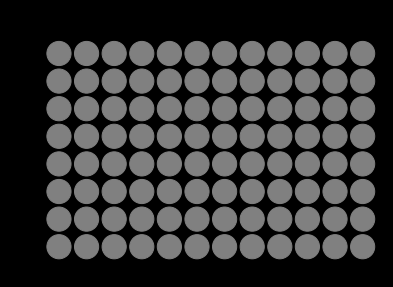

In [215]:
import matplotlib.pyplot as plt

a1_x = 0.1
a1_y = 0.2
shape = 'circle'
radius = 0.035
side_length = 0.054
well_spacing = 0.08
size_param = {}
size_param['circle'] = radius
size_param['square'] = side_length
matplotlib.rcParams['figure.figsize'] = (6.0, 4)

pl = PlateLighting(a1_x, a1_y, shape, size_param, well_spacing)

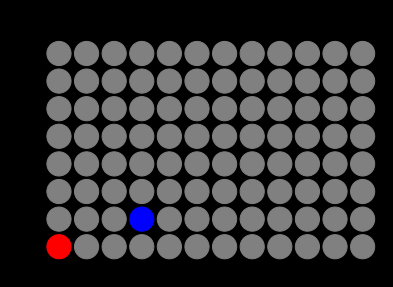

In [208]:
pl.setTarget('A1')
pl.setFilled('B4')
pl.fig

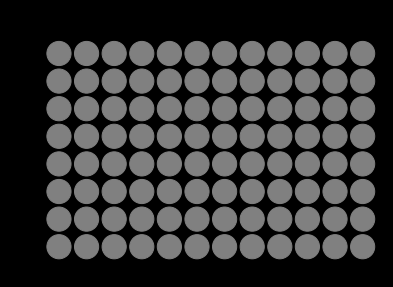

In [209]:
pl.emptyWells()
pl.fig

In [210]:
def makeWells():
    well_rows = [chr(x) for x in range(ord('A'), ord('H') + 1)]
    well_nums = [x for x in range(1,13)]

    well_list = []
    well_dict = {}
    for idx_r, row in enumerate(well_rows):
        for idx_n, num in enumerate(well_nums):

            well_name = row + str(num)
            well_list.append(well_name)
            x_coord = a1_x + well_spacing * idx_r
            y_coord = a1_y + well_spacing * idx_n

            well_dict[well_name] = Well((x_coord, y_coord),
                                             shape, radius)
    return well_dict, well_list

wd, wl = makeWells()

wd['A1'].marker

In [37]:
well_rows = [chr(x) for x in range(ord('A'), ord('H') + 1)] # move to state machine
# make a list of well names in column wise order 
well_names = []
for i in range(1, 13):
    for letter in well_rows:
        well_names.append(letter+str(i))


In [48]:
import numpy as np

mn = np.asarray(well_names)
data = np.sort(mn)


In [51]:
data.reshape((8,12))
data.sort(axis=1, order='Alphanumeric')

ValueError: Cannot specify order when the array has no fields.

In [55]:
well_rows = [chr(x) for x in range(ord('A'), ord('H') + 1)]
well_nums = [x for x in range(1,13)]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [49]:
t = Transfer('dupes.csv')
t.checkDuplicateDestination()
t.checkDuplicateSource()

TargetWell A2 is duplicated in rows [0, 1, 4]
TargetWell D3 is duplicated in rows [8, 9]
Plate p2 has duplicates: 
 SourceWell A2 is duplicated in rows [5, 6]

Plate p3 has duplicates: 
 SourceWell B5 is duplicated in rows [9, 10]
SourceWell H1 is duplicated in rows [11, 12, 13]



True

In [9]:
p = [1, 2 ,3]
d = [2, 3]

a = zip(p,d)

AttributeError: 'list' object has no attribute 'unique'

In [16]:
1 in p

True